# Pauli Gadgets generation

import necessary packages

In [1]:
from pytket.circuit import Circuit
from pytket.transform import PauliSynthStrat

In [2]:
t = 5

In [3]:
c = Circuit(3, name="Pauli Gadgets")
c.H(0).Sdg(1)
c.H(1).CX(0,1).CX(1,2).Rz(2*t, 2)
c.CX(1,2).CX(0,1).H(1)
c.S(1).H(0)

[H q[0]; Sdg q[1]; H q[1]; CX q[0], q[1]; CX q[1], q[2]; Rz(2) q[2]; CX q[1], q[2]; CX q[0], q[1]; H q[0]; H q[1]; S q[1]; ]

In [4]:
from pytket.circuit.display import render_circuit_jupyter

In [5]:
render_circuit_jupyter(c)

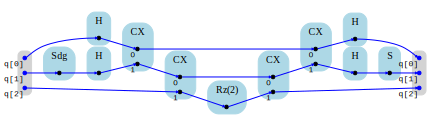

In [6]:
from pytket.utils import Graph
G = Graph(c)
G.get_DAG()

connectivity graph

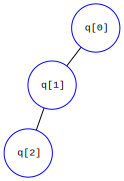

In [7]:
G.get_qubit_graph()

In [30]:
c = Circuit(2, name="Pauli Gadgets")
# c.X(0).X(1)
c.CX(1,0).Rz(0.2, 0)
c.CX(1,0)
print(tk_to_qiskit(c))

     ┌───┐┌─────────┐┌───┐
q_0: ┤ X ├┤ Rz(π/5) ├┤ X ├
     └─┬─┘└─────────┘└─┬─┘
q_1: ──■───────────────■──
                          


In [42]:
from pytket.extensions.qiskit import tk_to_qiskit
print(tk_to_qiskit(C))

     ┌───┐┌─────────┐┌───┐
q_0: ┤ X ├┤ Rz(π/5) ├┤ X ├
     └─┬─┘└─────────┘└─┬─┘
q_1: ──■───────────────■──
                          


In [41]:
from pytket.circuit import Circuit, OpType, PauliExpBox
from pytket.transform import Transform
from pytket.pauli import Pauli
C = Circuit(2)
pbox = PauliExpBox([Pauli.Z, Pauli.Z], 0.2)
C.add_pauliexpbox(pbox, [0, 1])
Transform.DecomposeBoxes().apply(C)

True

In [9]:
cmds = c.get_commands()
print(cmds)

[H q[0];, Sdg q[1];, H q[1];, CX q[0], q[1];, CX q[1], q[2];, Rz(2) q[2];, CX q[1], q[2];, CX q[0], q[1];, H q[0];, H q[1];, S q[1];]


Import Aer Backend

In [8]:
from pytket.extensions.qiskit import (
    AerStateBackend,
    AerBackend,
    AerUnitaryBackend,
)
from pytket.extensions.projectq import ProjectQBackend

In [44]:
import numpy as np
np.cos(np.pi/10)


0.9510565162951535

In [43]:
aer_state_b = AerStateBackend()
state_handle = aer_state_b.process_circuit(C)
statevector = aer_state_b.get_result(state_handle).get_state()
print(statevector)

[0.95105652-0.30901699j 0.        +0.j         0.        +0.j
 0.        +0.j        ]


In [31]:
aer_state_b = AerStateBackend()
state_handle = aer_state_b.process_circuit(c)
statevector = aer_state_b.get_result(state_handle).get_state()
print(statevector)

[0.95105652-0.30901699j 0.        +0.j         0.        +0.j
 0.        +0.j        ]


Unitary backend with ful matrix returned

In [13]:
aer_unitary_b = AerUnitaryBackend()
result = aer_unitary_b.run_circuit(c)
print(result.get_unitary())

[[-1.00000000e+00+1.22464680e-16j  0.00000000e+00+0.00000000e+00j
  -6.12323400e-17+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   3.74939946e-33-6.12323400e-17j  0.00000000e+00+0.00000000e+00j
  -1.22464680e-16+3.74939946e-33j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.00000000e+00+1.22464680e-16j
   0.00000000e+00+0.00000000e+00j -6.12323400e-17+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -1.12481984e-32-6.12323400e-17j
   0.00000000e+00+0.00000000e+00j  1.22464680e-16-1.12481984e-32j]
 [ 6.12323400e-17+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  -1.00000000e+00+2.44929360e-16j -0.00000000e+00+0.00000000e+00j
   1.22464680e-16-3.74939946e-33j -0.00000000e+00+0.00000000e+00j
   3.74939946e-33-6.12323400e-17j -0.00000000e+00+0.00000000e+00j]
 [-0.00000000e+00+0.00000000e+00j  6.12323400e-17+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j -1.00000000e+00+2.44929360e-16j
  -0.00000000e+00+0.00000000e+00j -1.22464680e-16+1.12481984e-32j
  -0.00

TEKT measurements

In [14]:
statevector = c.get_statevector()
unitary = c.get_unitary()

In [15]:
c.measure_all()

[H q[0]; Sdg q[1]; H q[1]; CX q[0], q[1]; CX q[1], q[2]; Rz(2) q[2]; CX q[1], q[2]; Measure q[2] --> c[2]; CX q[0], q[1]; H q[0]; H q[1]; Measure q[0] --> c[0]; S q[1]; Measure q[1] --> c[1]; ]

Let's get a number of shots/measurement out of the circuit

In [16]:
aer_b = AerBackend()
handle = aer_b.process_circuit(c, n_shots=10, seed=1)
counts = aer_b.get_result(handle).get_counts()
print(counts)

Counter({(0, 0, 0): 10})


Finally, let's add some noise in the circuit

In [17]:
from qiskit.providers.aer.noise import NoiseModel

In [18]:
my_noise_model = NoiseModel()
readout_error = 0.2
for q in range(2):
    my_noise_model.add_readout_error(
        [[1 - readout_error, readout_error], [readout_error, 1 - readout_error]], [q]
    )

This simple noise model gives a 20% chance that, upon measurement, a qubit that would otherwise have been measured as $0$ would instead be measured as $1$, and vice versa. Let's see what our shot table looks like with this model:

In [20]:
noisy_aer_b = AerBackend(my_noise_model)
noisy_handle = noisy_aer_b.process_circuit(c, n_shots=10, seed=1, valid_check=False)
noisy_counts = noisy_aer_b.get_result(noisy_handle).get_counts()
print(noisy_counts)

Counter({(0, 0, 0): 9, (0, 1, 0): 1})
